# INTRODUCTION

   ### Tripadvisor, Inc. is an American online travel company which offers online hotel reservations and bookings for transportation, lodging, travel experiences, and restaurants. It features approximately 859 million reviews and opinions on approximately 8.6 million establishments. 


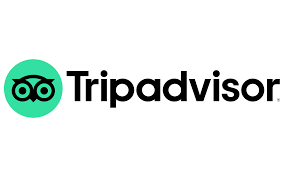

# PROBLEM STATEMENT
### Analysing the reviews of different hotels in Bengaluru and comparing ratings with the sentiment score of the reviews using sentiment analysis. Providing insights and short summary by processing the reviews recieved by each hotel.
 

# SCRAPING THE DATA

In [87]:
import requests
from bs4 import BeautifulSoup as soup

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.113 Safari/537.36'}

url='https://www.tripadvisor.in/Hotels-g297628-Bengaluru_Bangalore_District_Karnataka-Hotels.html'
page = requests.get(url,headers=headers)
page.status_code

In [ ]:
bsobj = soup(page.content,'lxml')

In [ ]:
links =[]

data=pd.DataFrame()

for review in bsobj.findAll('a',{'class':'review_count'}):
    a = review['href']
    a = 'https://www.tripadvisor.in'+ a

    a = a[:(a.find('Reviews')+7)] + '-or{}' + a[(a.find('Reviews')+7):]
    print(a,'\n')
    links.append(a)

In [ ]:
x=links[1]
x

In [ ]:
link=[]

d=np.arange(5,1001,5)
for y in d:
    link.append(x.format(y))

In [ ]:
data1=pd.DataFrame()

for i,x in enumerate(link):
    try:
        print(i,x)
        html3 = requests.get(x,headers=headers)

        sleep(randint(1,5))
        bsobj2 = soup(html3.content,'lxml')

        review=[]

        hotel=x[(x.find('Reviews')+12):-52]
        for r in bsobj2.findAll('q'):
            review.append(r.span.text.strip())
            print(r.span.text.strip(),'\n')

            new=pd.Series({'Hotel':hotel,'Review':r.span.text.strip()})
            data1=data1.append(new,ignore_index=True)
    except:
        break

In [ ]:
date=[]

for i,x in enumerate(link):
    try:
        print(i,x)
        html3 = requests.get(x,headers=headers)

        sleep(randint(1,5))
        bsobj2 = soup(html3.content,'lxml')

        review=[]
        for r in bsobj2.findAll('span', {'class': '_34Xs-BQm'}):
            r=str(r)
            d=r[69:-7]
            print(d,'\n')

            date.append(d)
    except:
        break

In [ ]:
ratings=[]

for i,x in enumerate(link):
    try:
        print(i,x)
        html3 = requests.get(x,headers=headers)

        sleep(randint(1,5))
        bsobj2 = soup(html3.content,'lxml')

        review=[]
        for r in bsobj2.findAll('div', {'class': 'nf9vGX55'}):
            r=str(r)
            print(r[92:-15])
            
            ratings.append(r[92:-15])
            
    except:
        break

In [ ]:
data1['Date']=date
data1['Ratings']=ratings
data1.head()

In [ ]:
data1['Hotel']='Conrad_Bengaluru'
data1['Ratings']=data1['Ratings'].astype('int')/10
data1.head()

# ANALYSING THE DATA

In [89]:
from random import randint
from time import sleep
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [221]:
data = pd.read_csv('Final_Data1.csv')

In [222]:
data.head()

,Unnamed: 0,Hotel,Review,Date,Ratings
0,0,Conrad_Bengaluru,My second stay here but still loving every mom...,June 2021,5.0
1,1,Conrad_Bengaluru,In a neighbourhood filled with a lot of ageing...,June 2021,5.0
2,2,Conrad_Bengaluru,A really enjoyable staycation. We were celebra...,April 2021,5.0
3,3,Conrad_Bengaluru,"Absolutely love the staff, they were hospitabl...",April 2021,5.0
4,4,Conrad_Bengaluru,We visited to Conrad April 2021 to celebrate m...,April 2021,5.0


In [223]:
data = data.drop('Unnamed: 0',axis=1)

In [224]:
data.shape

(13000, 4)

In [225]:
docs = data['Review']

In [226]:
docs[:5]

0    My second stay here but still loving every mom...
1    In a neighbourhood filled with a lot of ageing...
2    A really enjoyable staycation. We were celebra...
3    Absolutely love the staff, they were hospitabl...
4    We visited to Conrad April 2021 to celebrate m...
Name: Review, dtype: object

In [227]:
docs = docs.str.lower().str.replace('[^a-z\s]','')
docs_split = docs.str.split(' ')

In [228]:
docs_split[:2]

0    [my, second, stay, here, but, still, loving, e...
1    [in, a, neighbourhood, filled, with, a, lot, o...
Name: Review, dtype: object

In [229]:
tokens = []
for i in docs_split:
    tokens.extend(i)

In [230]:
len(tokens)

822697

In [231]:
len(np.unique(tokens))

24170

In [232]:
tokens_freq = pd.Series(tokens).value_counts().drop('')
tokens_freq

the              44280
and              35073
to               20259
a                15673
was              15526
                 ...  
throwing             1
servicesaurav        1
vinayi               1
manvarteam           1
edit                 1
Length: 24169, dtype: int64

In [233]:
tokens_df = pd.DataFrame(tokens_freq).reset_index().rename(columns={'index':'Token',0:'Count'})
tokens_df

,Token,Count
0,the,44280
1,and,35073
2,to,20259
3,a,15673
4,was,15526
...,...,...
24164,throwing,1
24165,servicesaurav,1
24166,vinayi,1
24167,manvarteam,1


In [234]:
sentence = docs.apply(remove_stopwords)

In [236]:
sentence[:2]

0    second stay loving moment wonderful staff grea...
1    neighbourhood filled lot ageing alsoran semilu...
Name: Review, dtype: object

In [237]:
split = sentence.str.split(' ')

In [238]:
tokens = []
for i in split:
    tokens.extend(i)

In [239]:
tokens_freq = pd.Series(tokens).value_counts().drop('')
tokens_non_common_df = pd.DataFrame(tokens_freq).reset_index().rename(columns={'index':'Token',0:'Count'})
tokens_non_common_df

,Token,Count
0,hotel,9913
1,good,9035
2,staff,7770
3,stay,6555
4,service,6487
...,...,...
23783,grabs,1
23784,professionalkudos,1
23785,amazingrooms,1
23786,rushaliand,1


# EDA

In [183]:
data['Month']=pd.to_datetime(data['Date'], errors = 'coerce')
data.head()

,Hotel,Review,Date,Ratings,Month,Sentiment_Score,sentiment
0,Conrad_Bengaluru,My second stay here but still loving every mom...,June 2021,5.0,2021-06-01,0.9887,Positive
1,Conrad_Bengaluru,In a neighbourhood filled with a lot of ageing...,June 2021,5.0,2021-06-01,0.9652,Positive
2,Conrad_Bengaluru,A really enjoyable staycation. We were celebra...,April 2021,5.0,2021-04-01,0.9926,Positive
3,Conrad_Bengaluru,"Absolutely love the staff, they were hospitabl...",April 2021,5.0,2021-04-01,0.5400,Positive
4,Conrad_Bengaluru,We visited to Conrad April 2021 to celebrate m...,April 2021,5.0,2021-04-01,0.9705,Positive


In [184]:
data['Month']=pd.DatetimeIndex(data['Month']).month.astype('object')
data.head()

,Hotel,Review,Date,Ratings,Month,Sentiment_Score,sentiment
0,Conrad_Bengaluru,My second stay here but still loving every mom...,June 2021,5.0,6,0.9887,Positive
1,Conrad_Bengaluru,In a neighbourhood filled with a lot of ageing...,June 2021,5.0,6,0.9652,Positive
2,Conrad_Bengaluru,A really enjoyable staycation. We were celebra...,April 2021,5.0,4,0.9926,Positive
3,Conrad_Bengaluru,"Absolutely love the staff, they were hospitabl...",April 2021,5.0,4,0.5400,Positive
4,Conrad_Bengaluru,We visited to Conrad April 2021 to celebrate m...,April 2021,5.0,4,0.9705,Positive


In [185]:
ratings=data.groupby('Month').count()['Date']
ratings

df=pd.DataFrame()
df['Month']=ratings.index
df['Count']=ratings.values
df.head()

,Month,Count
0,1.0,1193
1,2.0,1278
2,3.0,976
3,4.0,683
4,5.0,685


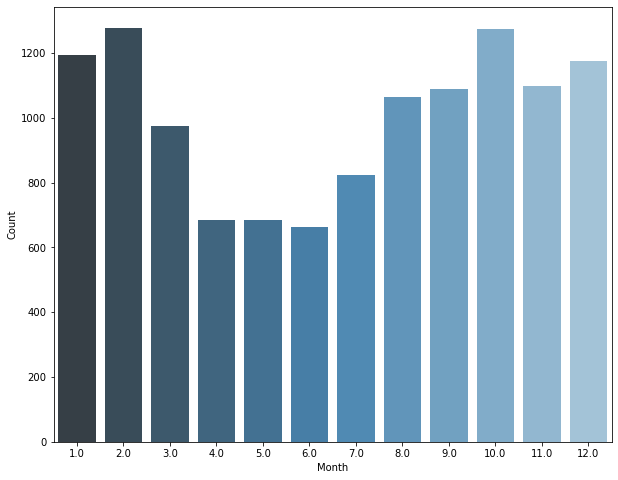

In [191]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Month'],y=df['Count'],palette="Blues_d")

In [111]:
data1=pd.read_csv('Final_Data.csv',parse_dates=['Date'])

In [112]:
ratings=data1.groupby('Date')['Review'].count()
ratings.head()

Date
2014-11-01    1
2014-12-01    1
2015-01-01    1
2015-02-01    5
2015-03-01    1
Name: Review, dtype: int64

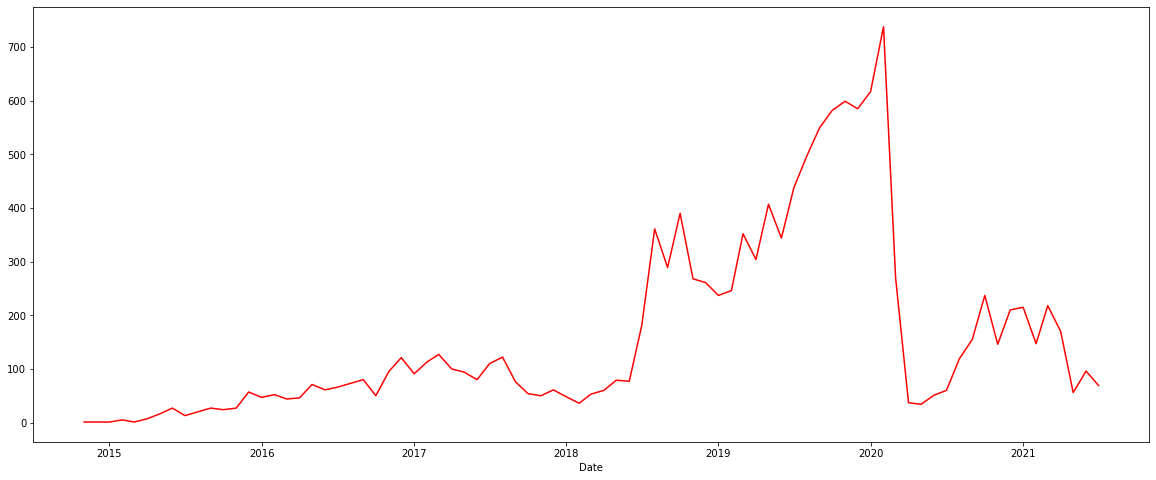

In [113]:
plt.figure(figsize=(20,8))
sns.lineplot(x=ratings.index,y=ratings.values,color='r')

# SENTIMENT ANALYSIS

#### 1. ANALYSING SENTIMENT SCORE

In [114]:
analyzer = SentimentIntensityAnalyzer()

In [115]:
l1 = []
for i in data['Review']:
    l1.append(analyzer.polarity_scores(i)['compound'])

In [116]:
data['Sentiment_Score'] = l1

In [117]:
a = pd.DataFrame(data.groupby(by='Hotel')['Sentiment_Score'].mean().sort_values(ascending=False))
a = a.reset_index()
a

,Hotel,Sentiment_Score
0,ITC_Windsor_Bengaluru_a_Luxury_Collection_Hotel,0.929599
1,The_Leela_Palace,0.925349
2,DoubleTree_Suites_By_Hilton_Bangalore,0.925072
3,Lemon_Tree_Hotel,0.919723
4,The_Oberoi_Bengaluru,0.912244
5,Keys_Select_Hosur_Road_By_Lemon_Tree_Hotels-Be...,0.892581
6,Conrad_Bengaluru,0.891843
7,Royal_Orchid_Central,0.879931
8,Vivanta_Bengaluru_Residency_Road,0.863924
9,Lemon_Tree_Premier_Ulsoor_Lake_Bengaluru,0.849790


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

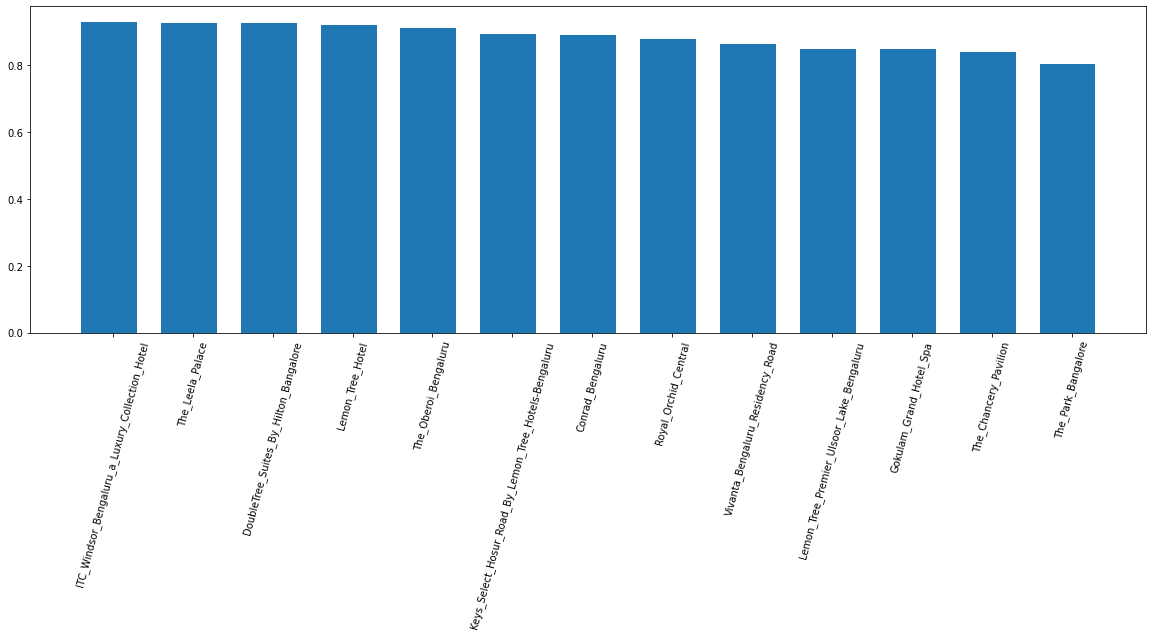

In [164]:
plt.figure(figsize=(20,6))
plt.bar(x=a['Hotel'],height=a['Sentiment_Score'],WIDTH=0.7)
plt.xticks(rotation=75)

In [120]:
df_ratings = pd.DataFrame(data.groupby(by='Hotel')['Ratings'].mean())
df_ratings = df_ratings.reset_index()

In [121]:
df_score = pd.DataFrame(data.groupby(by='Hotel')['Sentiment_Score'].mean())
df_score = df_score.reset_index()

In [122]:
df_score.head()

,Hotel,Sentiment_Score
0,Conrad_Bengaluru,0.891843
1,DoubleTree_Suites_By_Hilton_Bangalore,0.925072
2,Gokulam_Grand_Hotel_Spa,0.848707
3,ITC_Windsor_Bengaluru_a_Luxury_Collection_Hotel,0.929599
4,Keys_Select_Hosur_Road_By_Lemon_Tree_Hotels-Be...,0.892581


In [123]:
df_ratings.head()

,Hotel,Ratings
0,Conrad_Bengaluru,4.791
1,DoubleTree_Suites_By_Hilton_Bangalore,4.889
2,Gokulam_Grand_Hotel_Spa,4.604
3,ITC_Windsor_Bengaluru_a_Luxury_Collection_Hotel,4.905
4,Keys_Select_Hosur_Road_By_Lemon_Tree_Hotels-Be...,4.805


In [124]:
OldMin = -1
OldMax = 1
NewMin = 0
NewMax = 5
l2 = []
for OldValue in df_score['Sentiment_Score']:
        l2.append((((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin)

In [125]:
df_ratings['Sentiment Score'] = l2

In [126]:
df_ratings

,Hotel,Ratings,Sentiment Score
0,Conrad_Bengaluru,4.791,4.729608
1,DoubleTree_Suites_By_Hilton_Bangalore,4.889,4.812681
2,Gokulam_Grand_Hotel_Spa,4.604,4.621767
3,ITC_Windsor_Bengaluru_a_Luxury_Collection_Hotel,4.905,4.823997
4,Keys_Select_Hosur_Road_By_Lemon_Tree_Hotels-Be...,4.805,4.731453
5,Lemon_Tree_Hotel,4.851,4.799308
6,Lemon_Tree_Premier_Ulsoor_Lake_Bengaluru,4.553,4.624476
7,Royal_Orchid_Central,4.703,4.699828
8,The_Chancery_Pavilion,4.629,4.596835
9,The_Leela_Palace,4.910,4.813372


#### 2. APPLICATION OF WORDCLOUD

In [240]:
df=data[data['Hotel']=='Lemon_Tree_Hotel']
print(df.shape)
df.head()

(1000, 4)


,Hotel,Review,Date,Ratings
5000,Lemon_Tree_Hotel,House keeping is so good..Very responsible per...,June 2021,5.0
5001,Lemon_Tree_Hotel,"During this covid time,it is clean and safe pl...",June 2021,5.0
5002,Lemon_Tree_Hotel,I have checked into lemon tree hotels on June ...,June 2021,5.0
5003,Lemon_Tree_Hotel,Lemon tree hotel is one of the best hotel in m...,June 2021,5.0
5004,Lemon_Tree_Hotel,Very comfortable stay and staff are very frien...,June 2021,5.0


In [241]:
reviews=pd.DataFrame(''.join(df['Review']).split('.')).replace('',np.NaN).dropna().rename(columns={0:'Review'})
reviews

,Review
0,House keeping is so good
2,Very responsible persons
3,They give value to the Opinion of visitors
4,Hotel management is also good
5,Cab facilities also very good
...,...
5548,Food was prepared as it was directed
5549,Sonali and Lalit were very quick at service
5550,The gym and swimming pool area are neat and c...
5551,house cleaning department is also very attentive


In [242]:
analyzer=SentimentIntensityAnalyzer()
reviews['Sentiment']=reviews['Review'].apply(lambda v:analyzer.polarity_scores(v)['compound'])
reviews

,Review,Sentiment
0,House keeping is so good,0.5777
2,Very responsible persons,0.3804
3,They give value to the Opinion of visitors,0.3400
4,Hotel management is also good,0.4404
5,Cab facilities also very good,0.4927
...,...,...
5548,Food was prepared as it was directed,0.2263
5549,Sonali and Lalit were very quick at service,0.0000
5550,The gym and swimming pool area are neat and c...,0.6908
5551,house cleaning department is also very attentive,0.0000


In [247]:
def get_sentiment_label(compound_score):
    if compound_score > 0.2:
        return 'Positive'
    elif compound_score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

In [248]:
reviews['category']=reviews['Sentiment'].apply(get_sentiment_label)

In [249]:
reviews.head()

,Review,Sentiment,category
0,House keeping is so good,0.5777,Positive
2,Very responsible persons,0.3804,Positive
3,They give value to the Opinion of visitors,0.3400,Positive
4,Hotel management is also good,0.4404,Positive
5,Cab facilities also very good,0.4927,Positive


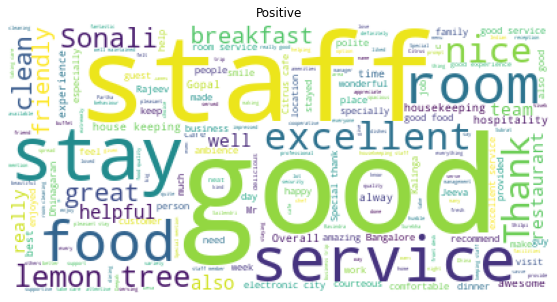

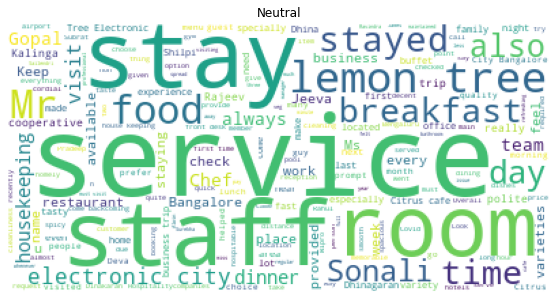

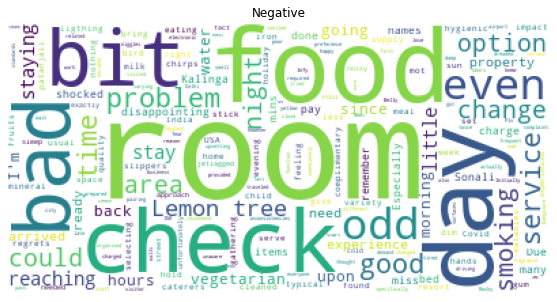

In [250]:
for category in reviews['category'].unique():
    plt.figure(figsize=(14,5))
    t=reviews[reviews['category']==category]['Review'].fillna('Not Available')
    stopwords=nltk.corpus.stopwords.words('english')
    custom_stopwords=['use', 'will', 'get', 'one', 'would', 'like','hotel']
    all_stopwords= np.hstack([stopwords,custom_stopwords])
    docs_strings= ' '.join(t)
    wc=WordCloud(background_color='white',stopwords=all_stopwords).generate(docs_strings)
    plt.imshow(wc)
    plt.title(category)
    plt.axis('off')

# MODEL

In [135]:
data

,Hotel,Review,Date,Ratings,Month,Sentiment_Score
0,Conrad_Bengaluru,My second stay here but still loving every mom...,June 2021,5.0,6,0.9887
1,Conrad_Bengaluru,In a neighbourhood filled with a lot of ageing...,June 2021,5.0,6,0.9652
2,Conrad_Bengaluru,A really enjoyable staycation. We were celebra...,April 2021,5.0,4,0.9926
3,Conrad_Bengaluru,"Absolutely love the staff, they were hospitabl...",April 2021,5.0,4,0.5400
4,Conrad_Bengaluru,We visited to Conrad April 2021 to celebrate m...,April 2021,5.0,4,0.9705
...,...,...,...,...,...,...
12995,Vivanta_Bengaluru_Residency_Road,Though I have stayed in Bangalore for 4 Years ...,May 2015,4.0,5,0.9712
12996,Vivanta_Bengaluru_Residency_Road,"The staff is great, very pleasant and unobtrus...",May 2015,4.0,5,0.9406
12997,Vivanta_Bengaluru_Residency_Road,"When I was checking out last week , there was ...",April 2015,5.0,4,0.9788
12998,Vivanta_Bengaluru_Residency_Road,Service was very good as well as facilities we...,April 2015,4.0,4,0.9504


In [174]:
sentiment_class = []
for score in data['Sentiment_Score']:
    if score > 0:
        sentiment_class.append('Positive')
    else :
        sentiment_class.append('Negative')
data['sentiment'] = sentiment_class
data.head()

,Hotel,Review,Date,Ratings,Month,Sentiment_Score,sentiment
0,Conrad_Bengaluru,My second stay here but still loving every mom...,June 2021,5.0,6,0.9887,Positive
1,Conrad_Bengaluru,In a neighbourhood filled with a lot of ageing...,June 2021,5.0,6,0.9652,Positive
2,Conrad_Bengaluru,A really enjoyable staycation. We were celebra...,April 2021,5.0,4,0.9926,Positive
3,Conrad_Bengaluru,"Absolutely love the staff, they were hospitabl...",April 2021,5.0,4,0.5400,Positive
4,Conrad_Bengaluru,We visited to Conrad April 2021 to celebrate m...,April 2021,5.0,4,0.9705,Positive


In [175]:
df_model = data[['Review','sentiment']]

In [176]:
docs

0        second stay loving moment wonderful staff grea...
1        neighbourhood filled lot ageing alsoran semilu...
2        enjoyable staycation celebrating special occas...
3        absolutely love staff hospitable usual times b...
4        visited conrad april celebrate wifes birthday ...
                               ...                        
12995    stayed bangalore years opportunity come gatewa...
12996    staff great pleasant unobtrusively helpful put...
12997    checking week sudden downpour booked cab come ...
12998    service good facilities good rooms comfortable...
12999    coming hotel right security gate restaurant ma...
Name: Review, Length: 13000, dtype: object

In [177]:
docs = docs.apply(remove_stopwords)

In [178]:
train_docs, test_docs = train_test_split(pd.Series(docs), test_size=0.2, random_state=1)

In [179]:
vectorizer = CountVectorizer().fit(train_docs)
vocab = vectorizer.get_feature_names()

train_dtm = vectorizer.transform(train_docs)
test_dtm= vectorizer.transform(test_docs)

train_y = df_model.loc[train_docs.index, 'sentiment']
test_y = df_model.loc[test_docs.index, 'sentiment']

In [180]:
print(train_y.shape)
print(test_y.shape)

(10400,)
(2600,)


In [181]:
logistic_model = LogisticRegression().fit(train_dtm, train_y)
pred = logistic_model.predict(test_dtm)
print('Accuracy score: ', accuracy_score(test_y, pred))
print('F1 score: ', f1_score(test_y, pred,average='weighted'))

Accuracy score:  0.9815384615384616
F1 score:  0.978708102242585
